## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [4]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

**Q1** Are each of these data sets Tidy?


**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

**(Click Here)**
Q1. Yes, all three datasets are tidy. In each dataset, every variable has its own column, each row represents a distinct observation, and each value is placed in its own cell. This conforms to the definition of a tidy dataset.
Q2. Yes, all three datasets have the same number of observations.
Q3.name, birth_year, death_year, profession, known_for
Q4. name, can be used as the key to join the datasets since it uniquely identifies each individual in all three datasets.



## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [99]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

**(Click Here)**
it would keep all rows from the right DataFrame, even if there are no matches in the left DataFrame.


## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [101]:
# Your code here

DF_combined = pd.merge(DF_professions, DF_dates, on='name', how='inner')
DF_combined



,name,profession,birth_year,death_year
0,Janaki Ammal,Botanist,1897,1984.0
1,Chien-Shiung Wu,Physicist,1912,1997.0
2,Katherine Johnson,Mathematician,1918,2020.0
3,Rosalind Franklin,Chemist,1920,1958.0
4,Vera Rubin,Astronomer,1928,2016.0
5,Gladys West,Mathematician,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,1947,NaN
7,Jennifer Doudna,Biochemist,1964,NaN


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [107]:
# Your code here
DF_combined = pd.merge(DF_professions, DF_works, on='name', how='inner')
DF_combined = pd.merge(DF_combined, DF_dates, on='name', how='inner')
DF_combined



,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
4,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN
5,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN
6,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN


## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [16]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [148]:
DF_merged = pd.merge(DF_purchases, DF_prices, on='item', how='inner')
total_revenue = DF_merged['price'].sum()
print(f"Total Revenue: ${total_revenue}")


Total Revenue: $5.75


In [21]:
#

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [153]:
# Your code here
DF_merged = pd.merge(DF_purchases, DF_prices, on='item', how='inner')
revenue_per_customer = DF_merged.groupby('customer_id')['price'].sum()
show(revenue_per_customer)


# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [26]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [310]:
num_variables = DF_raw.shape[1]
num_observations = DF_raw.shape[0]

num_variables

22

In [314]:
num_variables = DF_raw.shape[1]
num_observations = DF_raw.shape[0]

num_observations

173

**(Click Here to Explain your Results)**
* there are 21 variables (columns) in the dataset.
* The dataset contains 173 observations (rows).
* there are both categorical or numerical
* maybe sample_size


### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [328]:
major_category_counts = DF_raw['Major_category'].value_counts()
major_category_counts


Major_category
Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: count, dtype: int64

In [318]:
#the major with the lowest unemployment rate
lowest_unemployment = DF_raw.sort_values(by='Unemployment_rate', ascending=True)
lowest_unemployment[['Major', 'Unemployment_rate']]


,Major,Unemployment_rate
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0.000000
73,MILITARY TECHNOLOGIES,0.000000
83,BOTANY,0.000000
52,MATHEMATICS AND COMPUTER SCIENCE,0.000000
112,SOIL SCIENCE,0.000000
...,...,...
29,PUBLIC POLICY,0.128426
170,CLINICAL PSYCHOLOGY,0.149048
84,COMPUTER NETWORKING AND TELECOMMUNICATIONS,0.151850
89,PUBLIC ADMINISTRATION,0.159491


In [254]:
 #the major with the highest percentage of women
highest_percentage_women = DF_raw.sort_values(by='ShareWomen', ascending=False)
highest_percentage_women[['Major', 'ShareWomen']]


,Major,ShareWomen
164,EARLY CHILDHOOD EDUCATION,0.968954
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.967998
51,MEDICAL ASSISTING SERVICES,0.927807
138,ELEMENTARY EDUCATION,0.923745
150,FAMILY AND CONSUMER SCIENCES,0.910933
...,...,...
1,MINING AND MINERAL ENGINEERING,0.101852
26,CONSTRUCTION SERVICES,0.090713
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,0.077453
73,MILITARY TECHNOLOGIES,0.000000


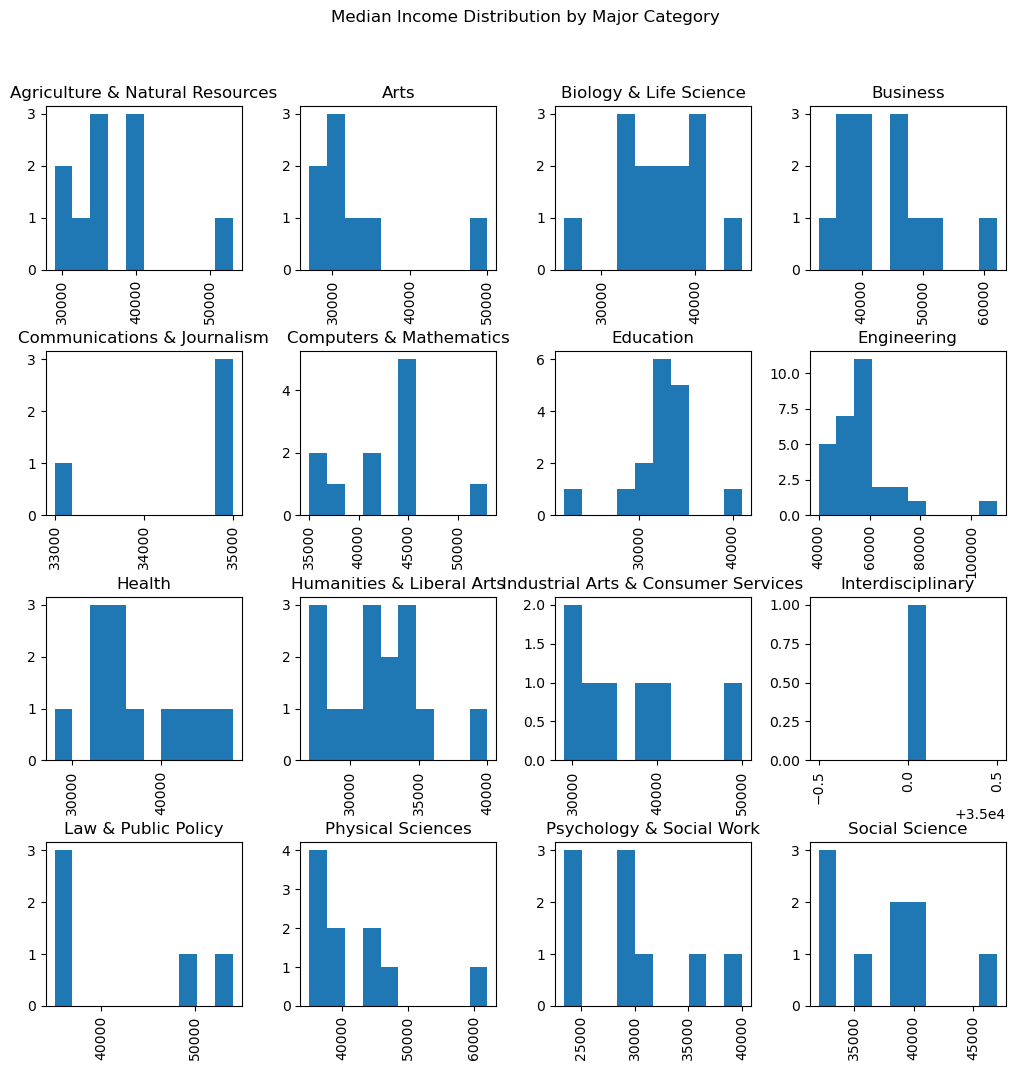

In [274]:

DF_raw.hist(column='Median', by='Major_category', figsize=(12, 12), bins=10)
plt.suptitle('Median Income Distribution by Major Category')
plt.show()


In [280]:
highest_median_income_category = DF_raw.groupby('Major_category')['Median'].median().idxmax()
highest_median_income = DF_raw.groupby('Major_category')['Median'].median().max()
highest_median_income_category, highest_median_income


('Engineering', 57000.0)

**(Click Here to Explain your Results)**
EDUCATIONAL ADMINISTRATION AND SUPERVISION has the lowest unemployment rate
EARLY CHILDHOOD EDUCATION	has highest percent of women in the task force
The median is chosen over the mean when describing typical income because it is less affected by extreme values or outliers. 
higest median was engineering

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [196]:

stem_categories = ["Biology & Life Science", "Computers & Mathematics", "Engineering", "Physical Sciences"]
stem_df = DF_raw[DF_raw['Major_category'].isin(stem_categories)]
stem_df.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [240]:
overall_median_salary = DF_raw['Median'].median()
low_salary_stem_majors = stem_df[stem_df['Median'] <= overall_median_salary]
low_salary_stem_majors[['Major', 'Median']]


,Major,Median
90,GEOSCIENCES,36000
92,ENVIRONMENTAL SCIENCE,35600
97,MULTI-DISCIPLINARY OR GENERAL SCIENCE,35000
101,PHYSIOLOGY,35000
105,COMMUNICATION TECHNOLOGIES,35000
108,NEUROSCIENCE,35000
110,ATMOSPHERIC SCIENCES AND METEOROLOGY,35000
122,MISCELLANEOUS BIOLOGY,33500
123,BIOLOGY,33400
132,ECOLOGY,33000


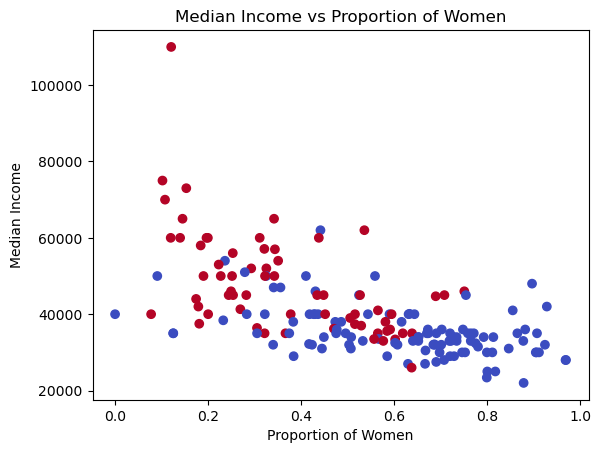

In [324]:
plt.scatter(DF_raw['ShareWomen'], DF_raw['Median'], c=DF_raw['Is_STEM'], cmap='coolwarm')
plt.title('Median Income vs Proportion of Women')
plt.xlabel('Proportion of Women')
plt.ylabel('Median Income')
plt.show()


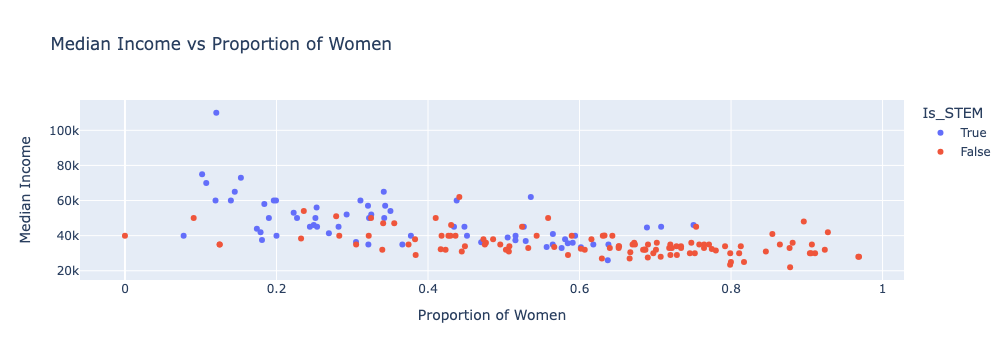

In [322]:
fig = px.scatter(DF_raw, x='ShareWomen', y='Median', color='Is_STEM',
                 title='Median Income vs Proportion of Women', 
                 labels={'ShareWomen': 'Proportion of Women', 'Median': 'Median Income'})

fig.show()


**(Click Here to Explain your Results)**



### 4. Ask a question of interest to you.

In [44]:
#

**(Click Here to Explain your Results)**